In [1]:
# Homework 2
# Sushmita V Gopalan

import lucem_illud 
import requests #for http requests
import nltk #the Natural Language Toolkit
import pandas #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import wordcloud #Makes word clouds
import numpy as np #For divergences/distances
import scipy #For divergences/distances
import seaborn as sns #makes our plots look nicer
import sklearn.manifold #For a manifold plot
from nltk.corpus import stopwords #For stopwords
import json #For API responses
import urllib.parse #For joining urls
import gzip
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


%matplotlib inline

#You should have them already downloaded in the data directory
try:
    #adding path for both local and server, only one of these will actually be used at a time
    nltk.data.path.append('/project2/macs60000/shared_data/nltk')
    nltk.data.path.append('../data')
    #Check that everything is in place
    nltk.corpus.gutenberg.fileids()
except LookupError:
    print("You have to download all the documents")
    print("Downloading to ../data this should only take a couple minutes")
    nltk.download('all', download_dir = '../data')
    nltk.data.path.append('../data')
#If you haven't downloaded the copura then you will have to run `nltk.download()`



In [2]:
# get data
# instructions on how to get this data - http://jmcauley.ucsd.edu/data/amazon/
# This data consists of 198,502 reviews of beauty products on Amazon between May 1996 - July 2014
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

full_df = getDF('reviews_Beauty_5.json.gz')

In [3]:
# get a random 30% subset of this data for the purposes of this assignment
np.random.seed(3534)
df = full_df.sample(round(0.3*len(full_df)))

# we're only interested in overall rating and review text - drop the remaining columns
df = df[['reviewText','overall']]

In [4]:
# split up data by rating
a_df = df.loc[df['overall'] == 1.0]
b_df = df.loc[df['overall'] == 2.0]
c_df = df.loc[df['overall'] == 3.0]
d_df = df.loc[df['overall'] == 4.0]
e_df = df.loc[df['overall'] == 5.0]

# tokenize each review        
a = a_df['reviewText'].apply(word_tokenize)
b = b_df['reviewText'].apply(word_tokenize)
c = c_df['reviewText'].apply(word_tokenize)
d = d_df['reviewText'].apply(word_tokenize)
e = e_df['reviewText'].apply(word_tokenize)


In [5]:
def wordCounter(wordLst):
    wordCounts = {}
    for word in wordLst:
        #We usually need to normalize the case
        wLower = word.lower()
        if wLower in wordCounts:
            wordCounts[wLower] += 1
        else:
            wordCounts[wLower] = 1
    #convert to DataFrame
    countsForFrame = {'word' : [], 'count' : []}
    for w, c in wordCounts.items():
        countsForFrame['word'].append(w)        
        countsForFrame['count'].append(c)
        
    return pandas.DataFrame(countsForFrame)

In [6]:
def get_list(series):
    rv = []
    for row in series:
        rv.extend(row)
    return rv


In [7]:


al = get_list(a)
bl = get_list(b)
cl = get_list(c)
dl = get_list(d)
el = get_list(e)


In [8]:
dfl = get_list(df)

In [9]:
# remove single characters and punctuations
a_l = [w.lower() for w in al if (w.isalpha() and len(w) >1)]
b_l = [w.lower() for w in bl if (w.isalpha() and len(w) >1)]
c_l = [w.lower() for w in cl if (w.isalpha() and len(w) >1)]
d_l = [w.lower() for w in dl if (w.isalpha() and len(w) >1)]
e_l = [w.lower() for w in el if (w.isalpha() and len(w) >1)]

In [10]:
df_l = [w.lower() for w in dfl if (w.isalpha() and len(w) >1)]

In [11]:
acount = wordCounter(a_l)
acount.sort_values('count', ascending=False, inplace=True)
acount = acount.reset_index()
bcount = wordCounter(b_l)
bcount.sort_values('count', ascending=False, inplace=True)
bcount = bcount.reset_index()
ccount = wordCounter(c_l)
ccount.sort_values('count', ascending=False, inplace=True)
ccount = ccount.reset_index()


dcount = wordCounter(d_l)
dcount.sort_values('count', ascending=False, inplace=True)
dcount = dcount.reset_index()


ecount = wordCounter(e_l)
ecount.sort_values('count', ascending=False, inplace=True)
ecount = ecount.reset_index()



In [12]:
wordcounts = pd.DataFrame({'1':acount.head(25)['word'], '2':bcount.head(25)['word'], '3':ccount.head(25)['word'], '4':dcount.head(25)['word'], '5':ecount.head(25)['word']})

In [13]:
wordcounts

,1,2,3,4,5
0,the,the,the,the,the
1,it,it,it,it,and
2,and,and,and,and,it
3,to,to,to,to,to
4,this,this,this,is,my
5,my,my,my,my,this
6,of,is,is,this,is
7,is,of,of,of,of
8,not,for,for,for,for
9,for,not,but,that,that


It's interesting that the top 25 most commonly used words are v similar for all 5 categories!

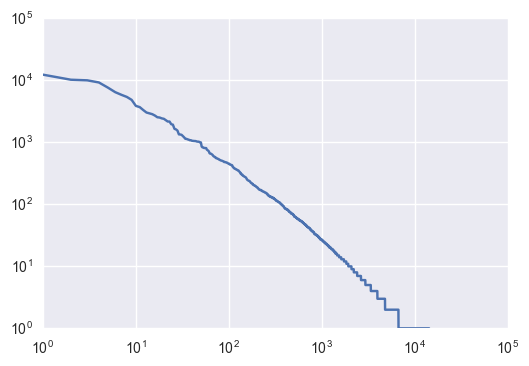

In [14]:
# Exploring Zipf's Law for reviews with rating = 1

countedWords = wordCounter(al)
countedWords.sort_values('count', ascending=False, inplace=True)


fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(range(len(countedWords)), countedWords['count'])
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()

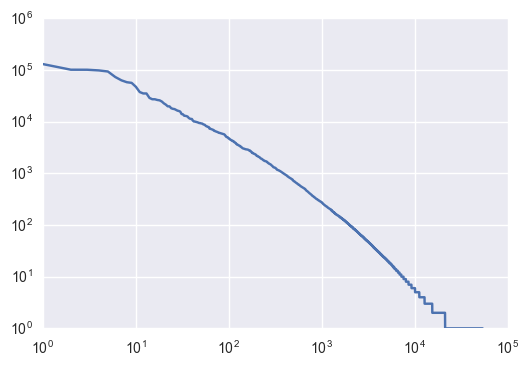

In [15]:
# Exploring Zipf's Law for reviews with rating = 5

countedWords = wordCounter(el)
countedWords.sort_values('count', ascending=False, inplace=True)


fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(range(len(countedWords)), countedWords['count'])
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()

Zipf's Law appears to hold

In [16]:
# Collocations
atext = nltk.Text(a_l)
btext = nltk.Text(b_l)
ctext = nltk.Text(c_l)
dtext = nltk.Text(d_l)
etext = nltk.Text(e_l)

texts = [atext, btext, ctext, dtext, etext]
    
for i in [0,1,2,3,4]:
    print("Collocations for rating = "+str(i+1))
    print(texts[i].collocations())



Collocations for rating = 1
sensitive skin; nail polish; first time; much better; flat iron; dark
circles; stopped using; high hopes; looks like; mineral oil; eye
cream; smells like; look like; customer service; absolutely nothing;
one star; feel like; felt like; something else; looked like
None
Collocations for rating = 2
sensitive skin; flat iron; high hopes; top coat; two stars; nail
polish; much better; curling iron; shea butter; even though; first
time; feel like; would recommend; dark circles; smells like; stopped
using; every time; argan oil; john frieda; years ago
None
Collocations for rating = 3
sensitive skin; nail polish; top coat; flat iron; body wash; feel
like; would recommend; curling iron; three stars; even though; argan
oil; skin tone; fine lines; much better; little bit; work well; drug
store; stretch marks; nothing special; long time
None
Collocations for rating = 4
sensitive skin; would recommend; flat iron; body wash; works well;
really like; nail polish; long time

In [17]:
# We explore collocations for the word 'recommend'

for i in [0,1,2,3,4]:
    print("Collocations for rating = "+str(i+1))
    print(texts[i].common_contexts(['recommend']))

Collocations for rating = 1
wo_this not_when not_the not_please not_or this_himalaya not_any
not_anyone eyelids_giving dont_this works_the highly_and would_so
right_that not_hated not_using would_used not_tired not_was
that_wayyyyy
None
Collocations for rating = 2
wo_this can_it would_highly mean_or should_it not_these not_you
not_anyone only_brilliantine not_picture not_instead highly_the
do_proceeding something_this definitely_this not_using not_was
would_to please_you it_others
None
Collocations for rating = 3
rather_using certainly_this really_using to_just would_letting they_on
personally_buying will_this definitely_wrist definitely_purchasing
product_you still_periodic lot_alternating and_to not_using still_this
will_stronger would_to hair_it ca_them
None
Collocations for rating = 4
perfectly_to would_nice tacky_this would_letting highly_love loves_it
would_switching tube_first skin_you product_you tone_and that_you
would_waiting would_love to_and would_shiny still_this highly_it

In [18]:
# We explore collocations for the word 'parabens' and find that as overall rating increases, the word is more commonly 
# associated with phrases that indicate an absence of parabens - a harmful chemical substance found in cosmetics


for i in [0,1,2,3,4]:
    print("Collocations for rating = "+str(i+1))
    print(texts[i].common_contexts(['parabens']))

Collocations for rating = 1
includes_read out_and letting_absorb of_became accumulated_in
has_actually with_its of_and of_plenty and_parabens parabens_due of_in
no_this rubbing_on soaps_are chemicals_etc has_or using_this it_are
of_women
None
Collocations for rating = 2
has_and as_was of_mineral contains_and contain_this the_and avoid_and
to_it contain_my no_no has_wo without_sulfates has_which contain_which
None
Collocations for rating = 3
of_became contained_so has_for no_preservatives of_and with_but
using_is with_do the_they use_as it_free products_and out_caffeine
to_but of_bought has_preservative no_petroleum freeof_and contains_and
has_in
None
Collocations for rating = 4
sulfates_etc but_have of_became drop_from without_etc ingested_have
have_wish of_used the_that to_this without_hurray contain_and
with_this are_parabens contain_which are_for called_not have_and
or_and contain_however
None
Collocations for rating = 5
without_sulphates no_and chemicals_fragrances creepy_or findin

In [19]:
# Exercise 2 - Only working with reviews that have rating = 1 and rating = 5

In [20]:
stop_words_nltk = stopwords.words('english')
#stop_words = ["the","it","she","he", "a"] #Uncomment this line if you want to use your own list of stopwords.

#The stemmers and lemmers need to be initialized before bing run
porter = nltk.stem.porter.PorterStemmer()
snowball = nltk.stem.snowball.SnowballStemmer('english')
wordnet = nltk.stem.WordNetLemmatizer()

def normlizeTokens(tokenLst, stopwordLst = None, stemmer = None, lemmer = None):
    #We can use a generator here as we just need to iterate over it

    #Lowering the case and removing non-words
    workingIter = (w.lower() for w in tokenLst if w.isalpha())

    #Now we can use the semmer, if provided
    if stemmer is not None:
        workingIter = (stemmer.stem(w) for w in workingIter)
        
    #And the lemmer
    if lemmer is not None:
        workingIter = (lemmer.lemmatize(w) for w in workingIter)
    
    #And remove the stopwords
    if stopwordLst is not None:
        workingIter = (w for w in workingIter if w not in stopwordLst)
    #We will return a list with the stopwords removed
    return list(workingIter)

a['normalized_tokens'] = a.apply(lambda x: normlizeTokens(x, stopwordLst = stop_words_nltk, stemmer = porter))
print("done")
a['normalized_tokens_count'] = a['normalized_tokens'].apply(lambda x: len(x))
print("done")


e['normalized_tokens'] = e.apply(lambda x: normlizeTokens(x, stopwordLst = stop_words_nltk, stemmer = porter))
print("done")


e['normalized_tokens_count'] = e['normalized_tokens'].apply(lambda x: len(x))


print("done")






done
done
done
done


In [21]:
ta = get_list(a['normalized_tokens'])
te = get_list(e['normalized_tokens'])


whcfdista = nltk.ConditionalFreqDist(((len(w), w) for w in ta[:5000]))
whcfdiste = nltk.ConditionalFreqDist(((len(w), w) for w in te[:5000]))



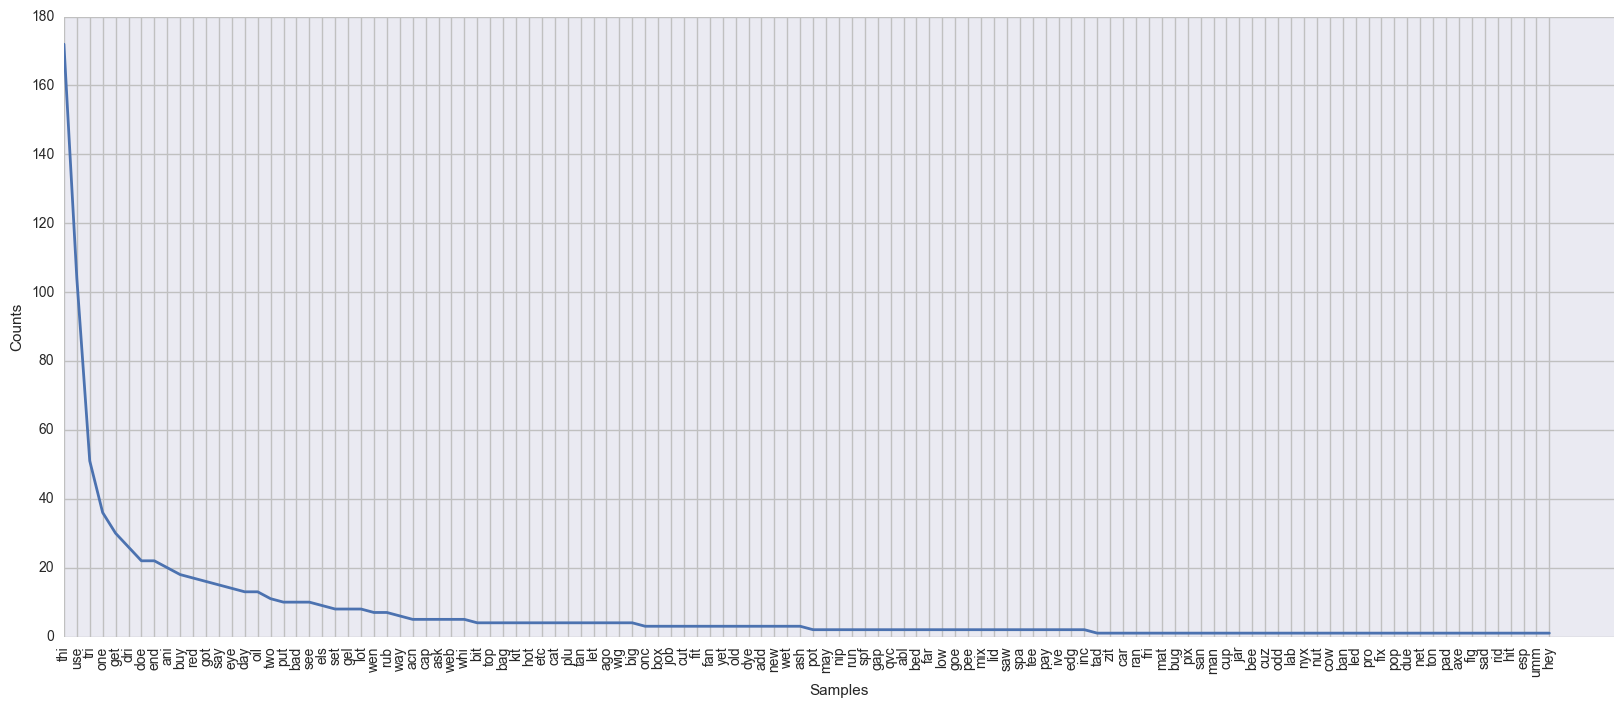

In [22]:
# Rating = 1
plt.figure(figsize=(20, 8))


whcfdista[3].plot()

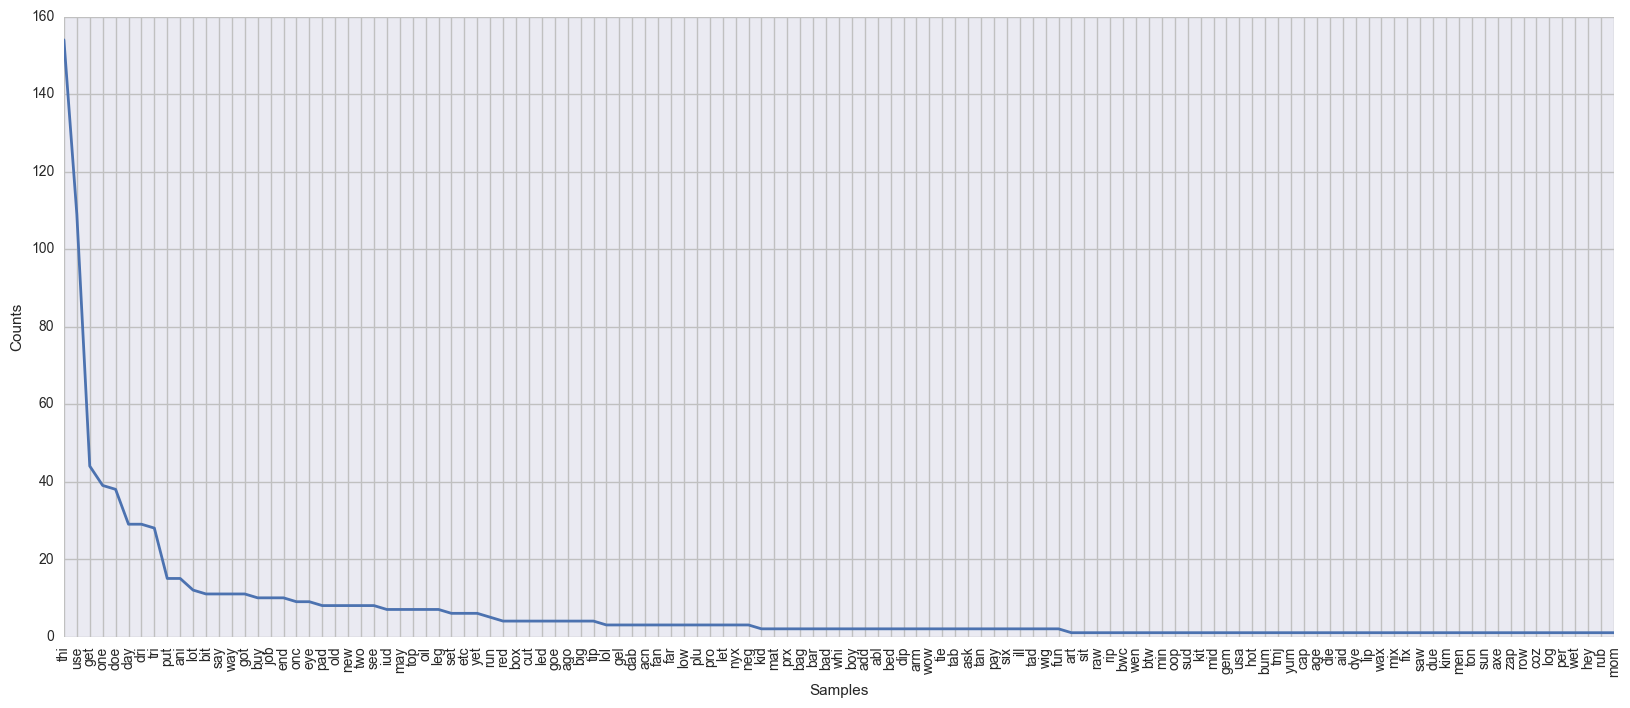

In [23]:
# Rating = 5
plt.figure(figsize=(20, 8))


whcfdiste[3].plot()

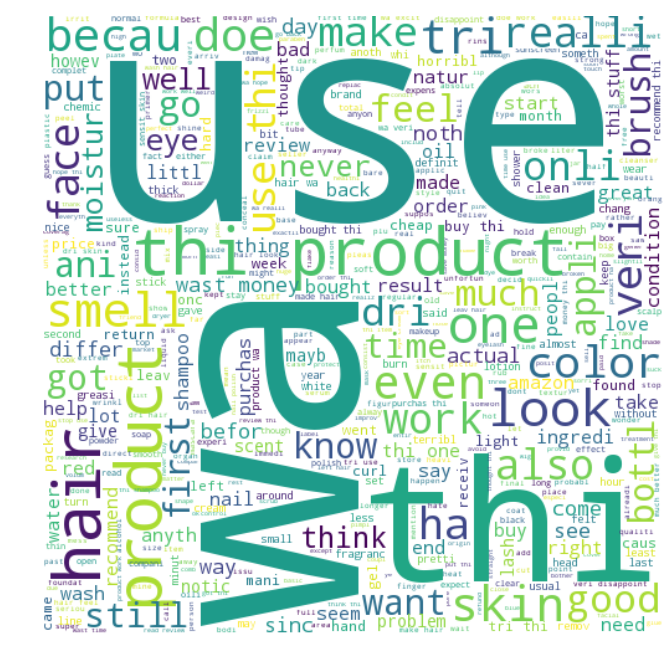

In [27]:
# Rating = 1
wca = wordcloud.WordCloud(background_color="white", max_words=500, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(' '.join(a['normalized_tokens'].sum()))
plt.figure(figsize=(20, 8))

plt.imshow(wca)
plt.axis("off")
plt.savefig("a_word_cloud.pdf", format = 'pdf')

# This word cloud contains prominent words from the reviews with rating = 1


In [ ]:
# Rating = 5
#wce = wordcloud.WordCloud(background_color="white", max_words=500, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(' '.join(e['normalized_tokens'].sum()))
#plt.figure(figsize=(20, 8))


#plt.imshow(wce)
#plt.axis("off")
#plt.savefig("e_word_cloud.pdf", format = 'pdf')

In [29]:
# Exercise 3

In [24]:
# Rating = 1
a['normalized_tokens_POS'] = [nltk.pos_tag(t) for t in a['normalized_tokens']]
st = get_list(a['normalized_tokens_POS'])
st_st = []
for element in st:
    st_st.append(element[0])

whBigrams = nltk.collocations.BigramCollocationFinder.from_words(st_st)

def bigramScoring(count, wordsTuple, total):
    return count

bigram_measures = nltk.collocations.BigramAssocMeasures()
whBigrams.score_ngrams(bigram_measures.likelihood_ratio)[:40]



[(('thi', 'product'), 4567.166373156438),
 (('wast', 'money'), 2700.633698914788),
 (('would', 'recommend'), 829.963440966457),
 (('thi', 'stuff'), 795.1949453037552),
 (('look', 'like'), 787.9956390900245),
 (('use', 'thi'), 741.4716039165125),
 (('sensit', 'skin'), 671.4130010131721),
 (('flat', 'iron'), 572.1815632680248),
 (('veri', 'disappoint'), 558.4243469570608),
 (('bought', 'thi'), 494.45847850924076),
 (('dark', 'circl'), 489.1700462998676),
 (('thi', 'one'), 489.0600222454476),
 (('nail', 'polish'), 486.7215978877652),
 (('feel', 'like'), 457.6993091109958),
 (('first', 'time'), 457.36948189002885),
 (('save', 'money'), 449.74773552796756),
 (('buy', 'thi'), 447.435230558111),
 (('much', 'better'), 439.59063156736977),
 (('smell', 'like'), 436.88721721431233),
 (('bb', 'cream'), 422.32126197533523),
 (('read', 'review'), 404.917883966875),
 (('recommend', 'thi'), 392.9764696752782),
 (('wa', 'excit'), 392.1829710906933),
 (('allerg', 'reaction'), 362.8719985856024),
 (('go'

In [25]:

#e['normalized_tokens_POS'] = [nltk.pos_tag(t) for t in e['normalized_tokens']]
#e_WordtoPOS = nltk.ConditionalFreqDist(pd.Series(e['normalized_tokens_POS']).sum())
#e_WordtoPOS['administr'].plot()

In [28]:
#a_POStoWord = nltk.ConditionalFreqDist((p, w) for w, p in a['normalized_tokens_POS'].sum())
#e_POStoWord = nltk.ConditionalFreqDist((p, w) for w, p in e['normalized_tokens_POS'].sum())
#a_POStoWord['JJS']
#e_POStoWord['JJS']
#a_POStoWord['NN'].most_common(5)
#e_POStoWord['NN'].most_common(5)

In [30]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
whTrigrams = nltk.collocations.TrigramCollocationFinder.from_words(st_st)
whTrigrams.score_ngrams(trigram_measures.student_t)[:20]

[(('use', 'thi', 'product'), 12.416246978853005),
 (('thi', 'product', 'wa'), 8.176189144619181),
 (('recommend', 'thi', 'product'), 7.708540879757642),
 (('would', 'recommend', 'thi'), 7.40055960445365),
 (('buy', 'thi', 'product'), 6.413642095384663),
 (('wast', 'money', 'thi'), 6.314408602984037),
 (('tri', 'thi', 'product'), 6.1166297024326655),
 (('like', 'thi', 'product'), 6.044037667905917),
 (('purchas', 'thi', 'product'), 5.783137056793667),
 (('thi', 'product', 'would'), 5.515270221068866),
 (('bought', 'thi', 'product'), 5.241608429671558),
 (('wa', 'excit', 'tri'), 5.095864519141579),
 (('thi', 'product', 'work'), 5.084997180515059),
 (('thi', 'product', 'becaus'), 5.00358619700264),
 (('wast', 'time', 'money'), 4.998302968099814),
 (('thi', 'product', 'doe'), 4.981685846234993),
 (('review', 'thi', 'product'), 4.915396793767508),
 (('thi', 'product', 'ha'), 4.912438639703436),
 (('made', 'hair', 'feel'), 4.892485731351002),
 (('thi', 'product', 'made'), 4.7282899784437165)

In [ ]:
# Exercise 4

b['normalized_tokens'] = b.apply(lambda x: normlizeTokens(x, stopwordLst = stop_words_nltk, stemmer = porter))
c['normalized_tokens'] = c.apply(lambda x: normlizeTokens(x, stopwordLst = stop_words_nltk, stemmer = porter))
d['normalized_tokens'] = d.apply(lambda x: normlizeTokens(x, stopwordLst = stop_words_nltk, stemmer = porter))

tb = get_list(b['normalized_tokens'])
tc = get_list(c['normalized_tokens'])
td = get_list(d['normalized_tokens'])




In [35]:
corpora = []

for tokens in [ta, tb, tc, td, te]:

    corpora.append(tokens)
    

In [36]:
corpora_s = []
corpora_nons = []
for corpus in corpora:
    s = []
    nons = []
    for word in corpus:
        if word in stop_words_nltk:
            s.append(word)
        else:
            nons.append(word)
    corpora_s.append(s)
    corpora_nons.append(nons)
    
def kl_divergence(X, Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    D_kl = scipy.stats.entropy(p, q)
    return D_kl

def chi2_divergence(X,Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    return scipy.stats.chisquare(p, q).statistic

def Divergence(corpus1, corpus2, difference="KL"):
    """Difference parameter can equal KL, Chi2, or Wass"""
    freqP = nltk.FreqDist(corpus1)
    P = pandas.DataFrame(list(freqP.values()), columns = ['frequency'], index = list(freqP.keys()))
    freqQ = nltk.FreqDist(corpus2)
    Q = pandas.DataFrame(list(freqQ.values()), columns = ['frequency'], index = list(freqQ.keys()))
    if difference == "KL":
        return kl_divergence(P, Q)
    elif difference == "Chi2":
        return chi2_divergence(P, Q)
    elif difference == "KS":
        try:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency']).statistic
        except:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency'])
    elif difference == "Wasserstein":
        try:
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None).statistic
        except:
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None)

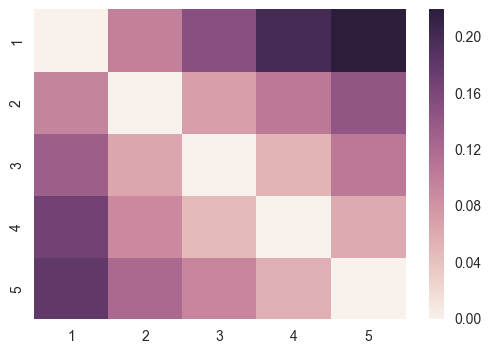

In [38]:
L = []
for p in corpora:
    l = []
    for q in corpora:
        l.append(Divergence(p,q, difference = 'KL'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = ['1','2','3','4','5'], index = ['1','2','3','4','5'])
ax = sns.heatmap(div)
plt.show()

/Users/sushmitavgopalan/anaconda/lib/python3.5/site-packages/sklearn/manifold/mds.py:407: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


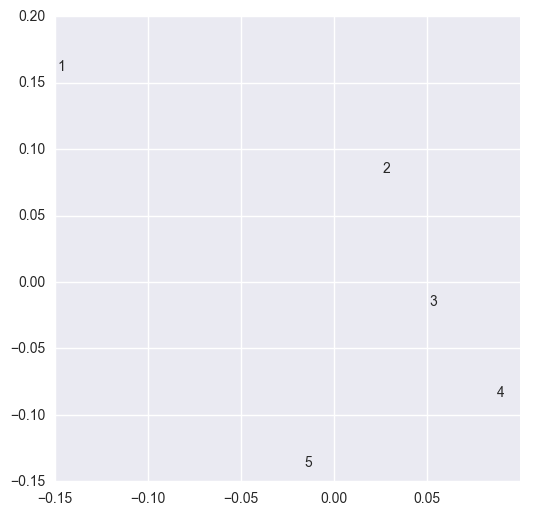

In [39]:
fileids = ['1','2','3','4','5']
mds = sklearn.manifold.MDS()
pos = mds.fit(M).embedding_
x = pos[:,0]
y = pos[:,1]
fig, ax = plt.subplots(figsize = (6,6))
plt.plot(x, y, ' ')
for i, txt in enumerate(fileids):
    ax.annotate(txt, (x[i],y[i]))


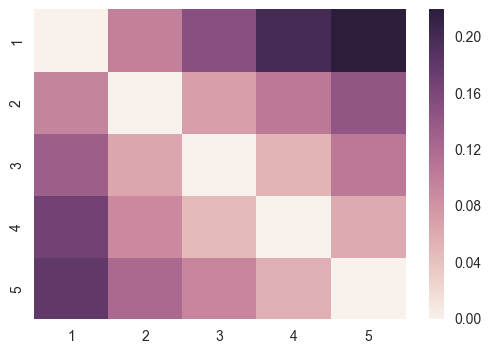

In [43]:
L = []
for p in corpora_nons:
    l = []
    for q in corpora_nons:
        l.append(Divergence(p,q, difference='KL'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

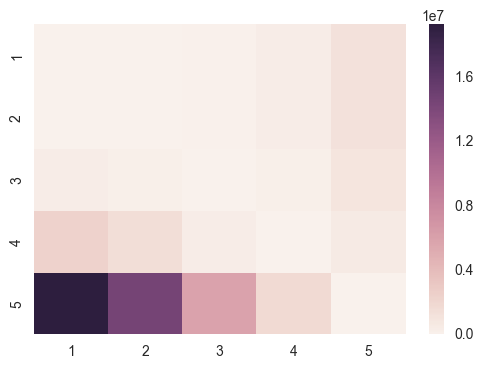

In [44]:
L = []
for p in corpora_nons:
    l = []
    for q in corpora_nons:
        l.append(Divergence(p,q, difference='Chi2'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

Here we see that the reviews with rating 5 are very different from the others

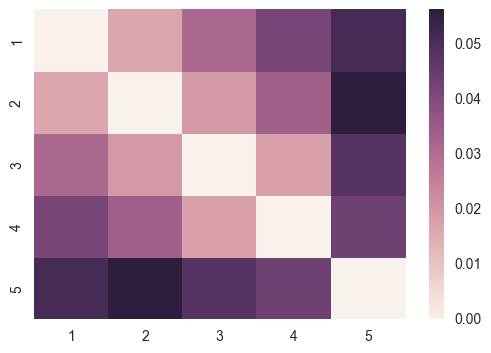

In [45]:
L = []
for p in corpora_nons:
    l = []
    for q in corpora_nons:
        l.append(Divergence(p,q, difference='KS'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

If JS divergence decreases, KL divergence will decrease as well.